In [1]:
import sklearn 
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline

In [2]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv(r'/Users/sankar/Downloads/suv_data-2.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.groupby('Purchased').size()

Purchased
0    257
1    143
dtype: int64

In [7]:
df1=df.drop(columns=['User ID'],axis=1)
df1.head()


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [8]:
df1.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<AxesSubplot:xlabel='Purchased', ylabel='count'>

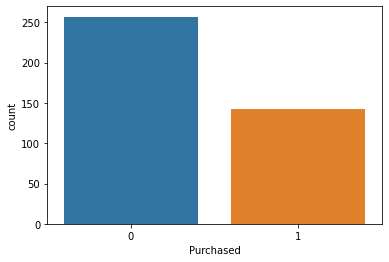

In [9]:
sns.countplot(x="Purchased",data=df1)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

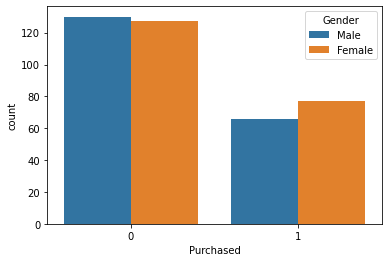

In [10]:
sns.countplot(x='Purchased', hue="Gender" , data=df1)

<AxesSubplot:>

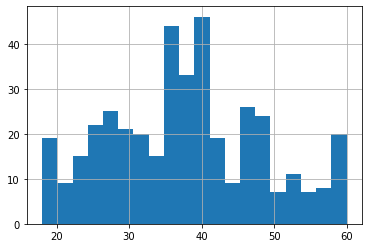

In [11]:
df['Age'].hist(bins=20)

In [12]:
age_category=[]
for i in range (0, len  (df['Age'])):
    if df1['Age'][i] <= 20:
        age_category.append ('A');
    elif 20< df1['Age'][i] <=26:
        age_category.append("B");
    elif 26< df1['Age'][i] <=30:
        age_category.append("C");
    elif 30< df1['Age'][i] <=40:
        age_category.append("D");  
    elif 40< df1['Age'][i] <=50:
        age_category.append("E");
    else:
        age_category.append("F")

In [13]:
age_df = pd.DataFrame (data = age_category, columns = ['AgeCategory'])
augmented_data_set = pd.concat([df1, age_df], axis = 1)
augmented_data_set.head()

,Gender,Age,EstimatedSalary,Purchased,AgeCategory
0,Male,19,19000,0,A
1,Male,35,20000,0,D
2,Female,26,43000,0,B
3,Female,27,57000,0,C
4,Male,19,76000,0,A


<AxesSubplot:xlabel='Purchased', ylabel='count'>

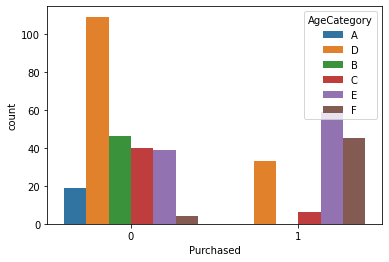

In [14]:
sns.countplot(x="Purchased",hue="AgeCategory",data=augmented_data_set)

<AxesSubplot:>

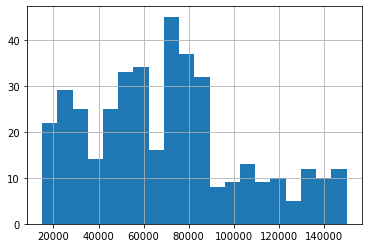

In [15]:
df['EstimatedSalary'].hist(bins=20)

In [16]:
income_category=[]
for i in range(0,len(df["EstimatedSalary"])):
    if df1['EstimatedSalary'][i] <= 19500:
        income_category.append ('Very Low');
    elif 19500< df1['EstimatedSalary'][i] <= 40000:
        income_category.append ('Low');
    elif 40000< df1['EstimatedSalary'][i] <= 60000:
        income_category.append (' Moderately Low');
    elif 60000 < df1['EstimatedSalary'][i] <= 80000:
        income_category.append ('Medium');
    elif 80000 < df1['EstimatedSalary'][i] <= 100000:
        income_category.append ('Moderately high');
    elif 100000 < df1 ['EstimatedSalary'][i] <= 130000:
        income_category.append ('Very High');
    elif 130000 < df1['EstimatedSalary'][i] <= 145000:
        income_category.append ('Very High');
    else:
        income_category.append ('Extremely High');
               
income_df = pd.DataFrame (data = income_category, columns = ['IncomeCategory'])
augmented_data_set2 = pd.concat([augmented_data_set, income_df], axis = 1)
augmented_data_set2.head()

,Gender,Age,EstimatedSalary,Purchased,AgeCategory,IncomeCategory
0,Male,19,19000,0,A,Very Low
1,Male,35,20000,0,D,Low
2,Female,26,43000,0,B,Moderately Low
3,Female,27,57000,0,C,Moderately Low
4,Male,19,76000,0,A,Medium


In [17]:
df1.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


<AxesSubplot:xlabel='Purchased', ylabel='count'>

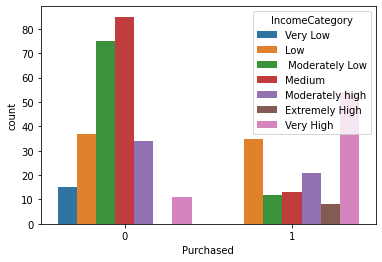

In [18]:
sns.countplot(x="Purchased",hue="IncomeCategory",data=augmented_data_set2)

In [19]:
dummy_gender=pd.get_dummies(augmented_data_set2["Gender"],drop_first=True)
dummy_gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [20]:
dummy_age=pd.get_dummies(augmented_data_set2["AgeCategory"])
dummy_age.head()

,A,B,C,D,E,F
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,1,0,0,0,0,0


In [21]:
dummy_income=pd.get_dummies(augmented_data_set2["IncomeCategory"])
dummy_income.head()

,Moderately Low,Extremely High,Low,Medium,Moderately high,Very High,Very Low
0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0


In [22]:
final_data_set  = pd.concat ([augmented_data_set2, dummy_age, dummy_gender, dummy_income], axis = 1)
final_data_set_1 = final_data_set.drop (columns = ['Age', 'Gender', 'EstimatedSalary', 'IncomeCategory', 'AgeCategory'], axis = 1)
final_data_set_1.head ()

,Purchased,A,B,C,D,E,F,Male,Moderately Low,Extremely High,Low,Medium,Moderately high,Very High,Very Low
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0


In [23]:
Y = final_data_set_1 ['Purchased']  #TARGET
X = final_data_set_1.drop (columns = ['Purchased'], axis = 1)

In [24]:
X.head()

,A,B,C,D,E,F,Male,Moderately Low,Extremely High,Low,Medium,Moderately high,Very High,Very Low
0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,1,0,0,0


In [25]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [26]:
test_set_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = test_set_size, random_state = seed)
model = LogisticRegression (solver = 'liblinear')
model.fit (X_train, Y_train)

LogisticRegression(solver='liblinear')

In [27]:
predictions = model.predict (X_test)

In [28]:
report = classification_report (Y_test, predictions)
print (report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        58
           1       0.91      0.91      0.91        22

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



In [29]:
print (confusion_matrix (Y_test, predictions))

[[56  2]
 [ 2 20]]


In [30]:
accuracy_score (Y_test, predictions)

0.95

In [40]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [31]:
Y = df.iloc [:, 4]
X = df.iloc [:, 2:4]

In [32]:
print (X.head())

   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000


In [33]:
print (Y.head())

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


In [34]:
test_set_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = test_set_size, random_state = seed)

In [35]:
scaler = StandardScaler ()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [36]:
classifier = LogisticRegression (random_state = seed, solver = 'liblinear')
classifier.fit (X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [37]:
predictions = classifier.predict (X_test)

In [38]:
report = classification_report (Y_test, predictions)
print (report)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        58
           1       0.76      0.86      0.81        22

    accuracy                           0.89        80
   macro avg       0.85      0.88      0.86        80
weighted avg       0.89      0.89      0.89        80



In [39]:
accuracy_score (Y_test, predictions)

0.8875